# Day 09. Exercise 00
# Regularization

## 0. Imports

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.utils import shuffle
from sklearn.tree import plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

RS=21

## 1. Preprocessing

1. Read the file `dayofweek.csv` that you used in the previous day to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [2]:
df = pd.read_csv("../data/dayofweek.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   numTrials         1686 non-null   float64
 1   hour              1686 non-null   float64
 2   dayofweek         1686 non-null   int64  
 3   uid_user_0        1686 non-null   float64
 4   uid_user_1        1686 non-null   float64
 5   uid_user_10       1686 non-null   float64
 6   uid_user_11       1686 non-null   float64
 7   uid_user_12       1686 non-null   float64
 8   uid_user_13       1686 non-null   float64
 9   uid_user_14       1686 non-null   float64
 10  uid_user_15       1686 non-null   float64
 11  uid_user_16       1686 non-null   float64
 12  uid_user_17       1686 non-null   float64
 13  uid_user_18       1686 non-null   float64
 14  uid_user_19       1686 non-null   float64
 15  uid_user_2        1686 non-null   float64
 16  uid_user_20       1686 non-null   float64


,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
target = df["dayofweek"]
features = df.drop(columns=["dayofweek"])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=21, stratify=target)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1348, 43)
(1348,)
(338, 43)
(338,)


## 2. Logreg regularization

### a. Default regularization

1. Train a baseline model with the only parameters `random_state=21`, `fit_intercept=False`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model


The result of the code where you trained and evaluated the baseline model should be exactly like this (use `%%time` to get the info about how long it took to run the cell):

```
train -  0.62902   |   valid -  0.59259
train -  0.64633   |   valid -  0.62963
train -  0.63479   |   valid -  0.56296
train -  0.65622   |   valid -  0.61481
train -  0.63397   |   valid -  0.57778
train -  0.64056   |   valid -  0.59259
train -  0.64138   |   valid -  0.65926
train -  0.65952   |   valid -  0.56296
train -  0.64333   |   valid -  0.59701
train -  0.63674   |   valid -  0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943
```

In [5]:
model = LogisticRegression(random_state=RS, fit_intercept=False)

In [6]:
def ft_skfold(model, features, target):
    skf = StratifiedKFold(n_splits=10)
    ac_list = []
    for train_index, valid_index in skf.split(features, target):
        features_train = features.iloc[train_index]
        target_train = target.iloc[train_index]
        features_valid = features.iloc[valid_index]
        target_valid = target.iloc[valid_index]
        model.fit(features_train, target_train)
        predict_train = model.predict(features_train)
        predict_valid = model.predict(features_valid)
        ac_train = accuracy_score(target_train, predict_train)
        ac_valid = accuracy_score(target_valid, predict_valid)
        ac_list.append(ac_valid)
        print(f'train -  {ac_train:.5f}   |   valid -  {ac_valid:.5f}')
    
    av_acur = np.array(ac_list).mean()
    std_acur = np.array(ac_list).std()
    print(f'Average accuracy on crossval is {av_acur:.5f}')
    print(f'Std is {std_acur:.5f}')
    return av_acur
    

In [7]:
%%time
ft_skfold(model, X_train, y_train)

train -  0.62902   |   valid -  0.59259
train -  0.64633   |   valid -  0.62963
train -  0.63479   |   valid -  0.56296
train -  0.65622   |   valid -  0.61481
train -  0.63397   |   valid -  0.57778
train -  0.64056   |   valid -  0.59259
train -  0.64138   |   valid -  0.65926
train -  0.65952   |   valid -  0.56296
train -  0.64333   |   valid -  0.59701
train -  0.63674   |   valid -  0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943
CPU times: user 1.71 s, sys: 490 ms, total: 2.2 s
Wall time: 408 ms


0.6016473189607519

### b. Optimizing regularization parameters

1. In the cells below try different values of penalty: `none`, `l1`, `l2` – you can change the values of solver too.

In [8]:
penalty = ["none", "l1", "l2"]
solver = ["liblinear", "saga"]
for solv in solver:
    for pen in penalty:
        if solv == "liblinear" and pen=="none":
            continue
        model = LogisticRegression(random_state=RS, fit_intercept=False, solver=solv, penalty=pen)
        print(solv, pen)
        ft_skfold(model, X_train, y_train)
        

liblinear l1
train -  0.61830   |   valid -  0.54815
train -  0.62737   |   valid -  0.62222
train -  0.60511   |   valid -  0.54074
train -  0.63644   |   valid -  0.62222
train -  0.62407   |   valid -  0.55556
train -  0.62325   |   valid -  0.58519
train -  0.61253   |   valid -  0.63704
train -  0.64716   |   valid -  0.58519
train -  0.63015   |   valid -  0.59701
train -  0.61367   |   valid -  0.59701
Average accuracy on crossval is 0.58903
Std is 0.03129
liblinear l2
train -  0.61006   |   valid -  0.56296
train -  0.61665   |   valid -  0.61481
train -  0.61336   |   valid -  0.59259
train -  0.62902   |   valid -  0.60741
train -  0.60923   |   valid -  0.55556
train -  0.61500   |   valid -  0.57778
train -  0.61665   |   valid -  0.61481
train -  0.64056   |   valid -  0.53333
train -  0.62109   |   valid -  0.58209
train -  0.61120   |   valid -  0.57463
Average accuracy on crossval is 0.58160
Std is 0.02532
saga none
train -  0.66200   |   valid -  0.63704
train -  0.657

## 3. SVM regularization

### a. Default regularization

1. Train a baseline model with the only parameters `probability=True`, `kernel='linear'`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [9]:
model = svm.SVC(random_state=21, probability=True, kernel="linear")

In [10]:
%%time
ft_skfold(model, X_train, y_train)

train -  0.70486   |   valid -  0.65926
train -  0.69662   |   valid -  0.75556
train -  0.69415   |   valid -  0.62222
train -  0.70239   |   valid -  0.65185
train -  0.69085   |   valid -  0.65185
train -  0.68920   |   valid -  0.64444
train -  0.69250   |   valid -  0.72593
train -  0.70074   |   valid -  0.62222
train -  0.69605   |   valid -  0.61940
train -  0.71087   |   valid -  0.63433
Average accuracy on crossval is 0.65871
Std is 0.04359
CPU times: user 3.59 s, sys: 90.3 ms, total: 3.68 s
Wall time: 3.31 s


0.6587064676616916

### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `C`.

In [11]:
c = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0, 100.0]
for i in c:
    model = svm.SVC(random_state=21, probability=True, kernel="linear", C=i)
    print("-----", i)
    ft_skfold(model, X_train, y_train)

----- 0.1
train -  0.58120   |   valid -  0.55556
train -  0.57543   |   valid -  0.56296
train -  0.57378   |   valid -  0.57037
train -  0.59275   |   valid -  0.57037
train -  0.58120   |   valid -  0.54815
train -  0.57955   |   valid -  0.54815
train -  0.57296   |   valid -  0.61481
train -  0.59192   |   valid -  0.54815
train -  0.59967   |   valid -  0.52985
train -  0.57825   |   valid -  0.57463
Average accuracy on crossval is 0.56230
Std is 0.02177
----- 0.2
train -  0.63149   |   valid -  0.60000
train -  0.61748   |   valid -  0.58519
train -  0.63561   |   valid -  0.60741
train -  0.64551   |   valid -  0.60000
train -  0.64468   |   valid -  0.60000
train -  0.65128   |   valid -  0.59259
train -  0.63397   |   valid -  0.65926
train -  0.62737   |   valid -  0.57778
train -  0.62438   |   valid -  0.55970
train -  0.63180   |   valid -  0.61194
Average accuracy on crossval is 0.59939
Std is 0.02469
----- 0.5
train -  0.66694   |   valid -  0.63704
train -  0.66612   |

## 4. Tree

### a. Default regularization

1. Train a baseline model with the only parameter `max_depth=10` and `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [12]:
model = DecisionTreeClassifier(max_depth=10, random_state=21)

In [13]:
%%time
ft_skfold(model, X_train, y_train)

train -  0.81039   |   valid -  0.74074
train -  0.77741   |   valid -  0.74074
train -  0.83347   |   valid -  0.70370
train -  0.79720   |   valid -  0.76296
train -  0.82440   |   valid -  0.75556
train -  0.80379   |   valid -  0.68889
train -  0.80709   |   valid -  0.76296
train -  0.80132   |   valid -  0.65926
train -  0.80807   |   valid -  0.75373
train -  0.80478   |   valid -  0.68657
Average accuracy on crossval is 0.72551
Std is 0.03562
CPU times: user 64.9 ms, sys: 962 µs, total: 65.8 ms
Wall time: 65.2 ms


0.7255113322277501

### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `max_depth`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [14]:
best = 0
for i in ("best", "random"):
    for j in (1, 5, 10, 50, 100, 150, 200, 250):
        for k in (2, 5, 10):
            for n in (1, 2):
                model = DecisionTreeClassifier(max_depth=j, random_state=21, splitter=i, min_samples_split=k, min_samples_leaf=n)
                print("-----", i, j, k, n)
                b=ft_skfold(model, X_train, y_train)
                if b > best:
                    best=b
                    b_deph=j
                    b_samp_spl = k
                    b_leaf = n
                    b_splitter = i
print("best:", best, b_deph, b_samp_spl, b_leaf, b_splitter)

----- best 1 2 1
train -  0.35367   |   valid -  0.37037
train -  0.35449   |   valid -  0.36296
train -  0.35614   |   valid -  0.34815
train -  0.35449   |   valid -  0.36296
train -  0.35532   |   valid -  0.35556
train -  0.35367   |   valid -  0.37037
train -  0.35532   |   valid -  0.35556
train -  0.35614   |   valid -  0.34815
train -  0.35667   |   valid -  0.34328
train -  0.35750   |   valid -  0.33582
Average accuracy on crossval is 0.35532
Std is 0.01094
----- best 1 2 2
train -  0.35367   |   valid -  0.37037
train -  0.35449   |   valid -  0.36296
train -  0.35614   |   valid -  0.34815
train -  0.35449   |   valid -  0.36296
train -  0.35532   |   valid -  0.35556
train -  0.35367   |   valid -  0.37037
train -  0.35532   |   valid -  0.35556
train -  0.35614   |   valid -  0.34815
train -  0.35667   |   valid -  0.34328
train -  0.35750   |   valid -  0.33582
Average accuracy on crossval is 0.35532
Std is 0.01094
----- best 1 5 1
train -  0.35367   |   valid -  0.37037

train -  1.00000   |   valid -  0.88148
train -  1.00000   |   valid -  0.85185
train -  1.00000   |   valid -  0.92593
train -  1.00000   |   valid -  0.88148
train -  1.00000   |   valid -  0.88060
train -  1.00000   |   valid -  0.88060
Average accuracy on crossval is 0.88575
Std is 0.02374
----- best 50 2 2
train -  0.96043   |   valid -  0.85185
train -  0.95218   |   valid -  0.83704
train -  0.95960   |   valid -  0.81481
train -  0.95301   |   valid -  0.86667
train -  0.95301   |   valid -  0.88148
train -  0.95548   |   valid -  0.84444
train -  0.95218   |   valid -  0.88889
train -  0.95301   |   valid -  0.80741
train -  0.94893   |   valid -  0.81343
train -  0.96046   |   valid -  0.84328
Average accuracy on crossval is 0.84493
Std is 0.02676
----- best 50 5 1
train -  0.97609   |   valid -  0.85185
train -  0.97527   |   valid -  0.88889
train -  0.97857   |   valid -  0.85185
train -  0.98104   |   valid -  0.89630
train -  0.97444   |   valid -  0.88148
train -  0.978

train -  1.00000   |   valid -  0.85926
train -  1.00000   |   valid -  0.91852
train -  1.00000   |   valid -  0.86667
train -  1.00000   |   valid -  0.91111
train -  1.00000   |   valid -  0.88148
train -  1.00000   |   valid -  0.85185
train -  1.00000   |   valid -  0.92593
train -  1.00000   |   valid -  0.88148
train -  1.00000   |   valid -  0.88060
train -  1.00000   |   valid -  0.88060
Average accuracy on crossval is 0.88575
Std is 0.02374
----- best 200 2 2
train -  0.96043   |   valid -  0.85185
train -  0.95218   |   valid -  0.83704
train -  0.95960   |   valid -  0.81481
train -  0.95301   |   valid -  0.86667
train -  0.95301   |   valid -  0.88148
train -  0.95548   |   valid -  0.84444
train -  0.95218   |   valid -  0.88889
train -  0.95301   |   valid -  0.80741
train -  0.94893   |   valid -  0.81343
train -  0.96046   |   valid -  0.84328
Average accuracy on crossval is 0.84493
Std is 0.02676
----- best 200 5 1
train -  0.97609   |   valid -  0.85185
train -  0.9

train -  0.56636   |   valid -  0.56296
train -  0.56224   |   valid -  0.57037
train -  0.58368   |   valid -  0.57037
train -  0.57331   |   valid -  0.51493
train -  0.56837   |   valid -  0.46269
Average accuracy on crossval is 0.53628
Std is 0.03930
----- random 5 2 2
train -  0.56224   |   valid -  0.48148
train -  0.57131   |   valid -  0.57778
train -  0.58038   |   valid -  0.51111
train -  0.56389   |   valid -  0.54074
train -  0.56636   |   valid -  0.55556
train -  0.56636   |   valid -  0.56296
train -  0.56224   |   valid -  0.57037
train -  0.58285   |   valid -  0.57037
train -  0.57166   |   valid -  0.51493
train -  0.56590   |   valid -  0.46269
Average accuracy on crossval is 0.53480
Std is 0.03826
----- random 5 5 1
train -  0.56472   |   valid -  0.48148
train -  0.57296   |   valid -  0.58519
train -  0.58038   |   valid -  0.51111
train -  0.56389   |   valid -  0.54074
train -  0.56719   |   valid -  0.55556
train -  0.56636   |   valid -  0.56296
train -  0.5

train -  1.00000   |   valid -  0.87313
train -  1.00000   |   valid -  0.90299
Average accuracy on crossval is 0.88428
Std is 0.02852
----- random 100 2 2
train -  0.93075   |   valid -  0.84444
train -  0.92251   |   valid -  0.82963
train -  0.92333   |   valid -  0.77037
train -  0.93570   |   valid -  0.87407
train -  0.91261   |   valid -  0.84444
train -  0.93817   |   valid -  0.86667
train -  0.91756   |   valid -  0.82222
train -  0.92745   |   valid -  0.79259
train -  0.91598   |   valid -  0.76119
train -  0.92257   |   valid -  0.79104
Average accuracy on crossval is 0.81967
Std is 0.03729
----- random 100 5 1
train -  0.95713   |   valid -  0.86667
train -  0.96538   |   valid -  0.88148
train -  0.95301   |   valid -  0.83704
train -  0.96455   |   valid -  0.86667
train -  0.95796   |   valid -  0.84444
train -  0.96125   |   valid -  0.85926
train -  0.95548   |   valid -  0.85926
train -  0.95960   |   valid -  0.85926
train -  0.96046   |   valid -  0.85075
train - 

train -  1.00000   |   valid -  0.91852
train -  1.00000   |   valid -  0.82963
train -  1.00000   |   valid -  0.90370
train -  1.00000   |   valid -  0.89630
train -  1.00000   |   valid -  0.83704
train -  1.00000   |   valid -  0.91111
train -  1.00000   |   valid -  0.88148
train -  1.00000   |   valid -  0.87313
train -  1.00000   |   valid -  0.90299
Average accuracy on crossval is 0.88428
Std is 0.02852
----- random 250 2 2
train -  0.93075   |   valid -  0.84444
train -  0.92251   |   valid -  0.82963
train -  0.92333   |   valid -  0.77037
train -  0.93570   |   valid -  0.87407
train -  0.91261   |   valid -  0.84444
train -  0.93817   |   valid -  0.86667
train -  0.91756   |   valid -  0.82222
train -  0.92745   |   valid -  0.79259
train -  0.91598   |   valid -  0.76119
train -  0.92257   |   valid -  0.79104
Average accuracy on crossval is 0.81967
Std is 0.03729
----- random 250 5 1
train -  0.95713   |   valid -  0.86667
train -  0.96538   |   valid -  0.88148
train - 

## 5. Random forest

### a. Default regularization

1. Train a baseline model with the only parameters `n_estimators=50`, `max_depth=14`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [15]:
model = RandomForestClassifier(n_estimators=50, max_depth = 14, random_state=21)

In [16]:
%%time
ft_skfold(model, X_train, y_train)

train -  0.96455   |   valid -  0.88148
train -  0.96208   |   valid -  0.91852
train -  0.96785   |   valid -  0.86667
train -  0.96455   |   valid -  0.89630
train -  0.96538   |   valid -  0.91111
train -  0.96538   |   valid -  0.88148
train -  0.97115   |   valid -  0.91852
train -  0.96867   |   valid -  0.85185
train -  0.97364   |   valid -  0.88060
train -  0.97941   |   valid -  0.86567
Average accuracy on crossval is 0.88722
Std is 0.02204
CPU times: user 923 ms, sys: 7.84 ms, total: 931 ms
Wall time: 929 ms


0.8872194582642343

### b. Optimizing regularization parameters

1. In the new cells try different values of the parameters `max_depth` and `n_estimators`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [17]:
best = 0
for w in (0, 0.1, 0.5):
    for i in (1, 5, 10, 25, 50, 75, 100):
        for j in (1, 10, 50, 100, 150, 200, 250):
            model = RandomForestClassifier(n_estimators=j, max_depth = i, random_state=21, min_weight_fraction_leaf=w)
            print("-----", w, i, j)
            b=ft_skfold(model, X_train, y_train)
            if b > best:
                best=b
                b_deph=i
                n_est=j
                weight = w
print("best:", best, weight, b_deph, n_est)

----- 0 1 1
train -  0.25392   |   valid -  0.22963
train -  0.25144   |   valid -  0.25185
train -  0.24732   |   valid -  0.23704
train -  0.25144   |   valid -  0.25185
train -  0.24732   |   valid -  0.23704
train -  0.24485   |   valid -  0.25926
train -  0.24732   |   valid -  0.23704
train -  0.24567   |   valid -  0.25185
train -  0.24547   |   valid -  0.25373
train -  0.25206   |   valid -  0.24627
Average accuracy on crossval is 0.24556
Std is 0.00919
----- 0 1 10
train -  0.35614   |   valid -  0.34815
train -  0.42045   |   valid -  0.43704
train -  0.44270   |   valid -  0.37037
train -  0.38500   |   valid -  0.42222
train -  0.43199   |   valid -  0.40741
train -  0.43116   |   valid -  0.41481
train -  0.38005   |   valid -  0.39259
train -  0.41962   |   valid -  0.39259
train -  0.37397   |   valid -  0.35075
train -  0.41351   |   valid -  0.38806
Average accuracy on crossval is 0.39240
Std is 0.02794
----- 0 1 50
train -  0.38417   |   valid -  0.40741
train -  0.4

train -  0.87057   |   valid -  0.81481
train -  0.87799   |   valid -  0.76296
train -  0.88056   |   valid -  0.79104
train -  0.88056   |   valid -  0.78358
Average accuracy on crossval is 0.80191
Std is 0.03034
----- 0 10 150
train -  0.87387   |   valid -  0.75556
train -  0.87964   |   valid -  0.85926
train -  0.90190   |   valid -  0.80741
train -  0.90272   |   valid -  0.83704
train -  0.88211   |   valid -  0.83704
train -  0.88376   |   valid -  0.76296
train -  0.87552   |   valid -  0.83704
train -  0.88541   |   valid -  0.76296
train -  0.88056   |   valid -  0.79851
train -  0.88962   |   valid -  0.79851
Average accuracy on crossval is 0.80563
Std is 0.03477
----- 0 10 200
train -  0.87387   |   valid -  0.77037
train -  0.89860   |   valid -  0.87407
train -  0.90767   |   valid -  0.81481
train -  0.90437   |   valid -  0.83704
train -  0.88706   |   valid -  0.85926
train -  0.88788   |   valid -  0.77778
train -  0.87799   |   valid -  0.82963
train -  0.88129   |

train -  0.99918   |   valid -  0.88148
train -  0.99835   |   valid -  0.91852
train -  0.99670   |   valid -  0.86667
train -  0.99753   |   valid -  0.91045
train -  0.99588   |   valid -  0.88806
Average accuracy on crossval is 0.90355
Std is 0.02125
----- 0 75 50
train -  1.00000   |   valid -  0.89630
train -  1.00000   |   valid -  0.94815
train -  1.00000   |   valid -  0.90370
train -  1.00000   |   valid -  0.93333
train -  1.00000   |   valid -  0.91111
train -  1.00000   |   valid -  0.89630
train -  1.00000   |   valid -  0.91852
train -  1.00000   |   valid -  0.90370
train -  1.00000   |   valid -  0.93284
train -  0.99918   |   valid -  0.89552
Average accuracy on crossval is 0.91395
Std is 0.01762
----- 0 75 100
train -  1.00000   |   valid -  0.89630
train -  1.00000   |   valid -  0.95556
train -  1.00000   |   valid -  0.91111
train -  1.00000   |   valid -  0.93333
train -  1.00000   |   valid -  0.91111
train -  1.00000   |   valid -  0.89630
train -  1.00000   | 

train -  0.35367   |   valid -  0.37037
train -  0.35449   |   valid -  0.36296
train -  0.35614   |   valid -  0.34815
train -  0.35449   |   valid -  0.36296
train -  0.35532   |   valid -  0.35556
train -  0.35367   |   valid -  0.37037
train -  0.35532   |   valid -  0.35556
train -  0.35614   |   valid -  0.34815
train -  0.35667   |   valid -  0.34328
train -  0.35750   |   valid -  0.33582
Average accuracy on crossval is 0.35532
Std is 0.01094
----- 0.1 1 250
train -  0.35367   |   valid -  0.37037
train -  0.35449   |   valid -  0.36296
train -  0.35614   |   valid -  0.34815
train -  0.35449   |   valid -  0.36296
train -  0.35532   |   valid -  0.35556
train -  0.35367   |   valid -  0.37037
train -  0.35532   |   valid -  0.35556
train -  0.35614   |   valid -  0.34815
train -  0.35667   |   valid -  0.34328
train -  0.35750   |   valid -  0.33582
Average accuracy on crossval is 0.35532
Std is 0.01094
----- 0.1 5 1
train -  0.23495   |   valid -  0.22963
train -  0.23495   |

train -  0.36768   |   valid -  0.35556
train -  0.34926   |   valid -  0.33582
train -  0.37397   |   valid -  0.35821
Average accuracy on crossval is 0.36644
Std is 0.02350
----- 0.1 25 50
train -  0.39736   |   valid -  0.44444
train -  0.39901   |   valid -  0.42963
train -  0.40643   |   valid -  0.36296
train -  0.39901   |   valid -  0.42963
train -  0.40561   |   valid -  0.37037
train -  0.39489   |   valid -  0.42222
train -  0.39654   |   valid -  0.40741
train -  0.39984   |   valid -  0.37778
train -  0.39951   |   valid -  0.38806
train -  0.40033   |   valid -  0.37313
Average accuracy on crossval is 0.40056
Std is 0.02808
----- 0.1 25 100
train -  0.39736   |   valid -  0.44444
train -  0.39901   |   valid -  0.42963
train -  0.40643   |   valid -  0.36296
train -  0.39901   |   valid -  0.42963
train -  0.40561   |   valid -  0.37037
train -  0.39571   |   valid -  0.42963
train -  0.39654   |   valid -  0.40741
train -  0.39984   |   valid -  0.37778
train -  0.40362 

train -  0.39736   |   valid -  0.44444
train -  0.39901   |   valid -  0.42963
train -  0.40643   |   valid -  0.36296
train -  0.39901   |   valid -  0.42963
train -  0.40561   |   valid -  0.37037
train -  0.39901   |   valid -  0.42963
train -  0.40148   |   valid -  0.40741
train -  0.40478   |   valid -  0.37778
train -  0.40362   |   valid -  0.38806
train -  0.40445   |   valid -  0.38060
Average accuracy on crossval is 0.40205
Std is 0.02808
----- 0.1 75 250
train -  0.39736   |   valid -  0.44444
train -  0.39901   |   valid -  0.42963
train -  0.40643   |   valid -  0.36296
train -  0.39901   |   valid -  0.42963
train -  0.40561   |   valid -  0.37037
train -  0.39901   |   valid -  0.42963
train -  0.40148   |   valid -  0.40741
train -  0.39984   |   valid -  0.37778
train -  0.40362   |   valid -  0.38806
train -  0.40445   |   valid -  0.38060
Average accuracy on crossval is 0.40205
Std is 0.02808
----- 0.1 100 1
train -  0.23495   |   valid -  0.22963
train -  0.23495 

train -  0.23394   |   valid -  0.23881
train -  0.23394   |   valid -  0.23881
Average accuracy on crossval is 0.23443
Std is 0.00397
----- 0.5 5 50
train -  0.23495   |   valid -  0.22963
train -  0.23495   |   valid -  0.22963
train -  0.23495   |   valid -  0.22963
train -  0.23495   |   valid -  0.22963
train -  0.23413   |   valid -  0.23704
train -  0.23413   |   valid -  0.23704
train -  0.23413   |   valid -  0.23704
train -  0.23413   |   valid -  0.23704
train -  0.23394   |   valid -  0.23881
train -  0.23394   |   valid -  0.23881
Average accuracy on crossval is 0.23443
Std is 0.00397
----- 0.5 5 100
train -  0.23495   |   valid -  0.22963
train -  0.23495   |   valid -  0.22963
train -  0.23495   |   valid -  0.22963
train -  0.23495   |   valid -  0.22963
train -  0.23413   |   valid -  0.23704
train -  0.23413   |   valid -  0.23704
train -  0.23413   |   valid -  0.23704
train -  0.23413   |   valid -  0.23704
train -  0.23394   |   valid -  0.23881
train -  0.23394   

train -  0.23495   |   valid -  0.22963
train -  0.23495   |   valid -  0.22963
train -  0.23495   |   valid -  0.22963
train -  0.23413   |   valid -  0.23704
train -  0.23413   |   valid -  0.23704
train -  0.23413   |   valid -  0.23704
train -  0.23413   |   valid -  0.23704
train -  0.23394   |   valid -  0.23881
train -  0.23394   |   valid -  0.23881
Average accuracy on crossval is 0.23443
Std is 0.00397
----- 0.5 25 250
train -  0.23495   |   valid -  0.22963
train -  0.23495   |   valid -  0.22963
train -  0.23495   |   valid -  0.22963
train -  0.23495   |   valid -  0.22963
train -  0.23413   |   valid -  0.23704
train -  0.23413   |   valid -  0.23704
train -  0.23413   |   valid -  0.23704
train -  0.23413   |   valid -  0.23704
train -  0.23394   |   valid -  0.23881
train -  0.23394   |   valid -  0.23881
Average accuracy on crossval is 0.23443
Std is 0.00397
----- 0.5 50 1
train -  0.23495   |   valid -  0.22963
train -  0.23495   |   valid -  0.22963
train -  0.23495  

train -  0.23413   |   valid -  0.23704
train -  0.23394   |   valid -  0.23881
train -  0.23394   |   valid -  0.23881
Average accuracy on crossval is 0.23443
Std is 0.00397
----- 0.5 100 50
train -  0.23495   |   valid -  0.22963
train -  0.23495   |   valid -  0.22963
train -  0.23495   |   valid -  0.22963
train -  0.23495   |   valid -  0.22963
train -  0.23413   |   valid -  0.23704
train -  0.23413   |   valid -  0.23704
train -  0.23413   |   valid -  0.23704
train -  0.23413   |   valid -  0.23704
train -  0.23394   |   valid -  0.23881
train -  0.23394   |   valid -  0.23881
Average accuracy on crossval is 0.23443
Std is 0.00397
----- 0.5 100 100
train -  0.23495   |   valid -  0.22963
train -  0.23495   |   valid -  0.22963
train -  0.23495   |   valid -  0.22963
train -  0.23495   |   valid -  0.22963
train -  0.23413   |   valid -  0.23704
train -  0.23413   |   valid -  0.23704
train -  0.23413   |   valid -  0.23704
train -  0.23413   |   valid -  0.23704
train -  0.2339

## 6. Predictions

1. Choose the best model and use it to make predictions for the test dataset.
2. Calculate the final accuracy.
3. Analyze: for which weekday your model makes the most errors (in % of the total number of samples of that class in your test dataset).
4. Save the model.

In [18]:
model = RandomForestClassifier(n_estimators=100, max_depth = 25, random_state=21)
model.fit(X_train, y_train)
predict = model.predict(X_test)
accuracy_score(y_test, predict)

0.9289940828402367

In [19]:
 df_pred = pd.DataFrame(predict, columns={"pred"})

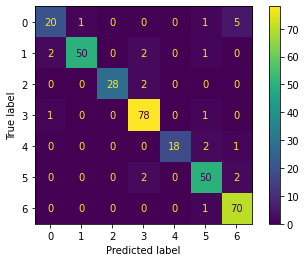

In [20]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [21]:
df_pred["target"] = y_test.reset_index(drop=True)
df_pred["res"] = (df_pred["pred"]==df_pred["target"])
df_pred

,pred,target,res
0,1,1,True
1,5,5,True
2,6,6,True
3,3,3,True
4,2,2,True
...,...,...,...
333,3,3,True
334,1,1,True
335,2,2,True
336,1,1,True


In [22]:
df_pred.groupby(df_pred["target"]).mean() * 100

,pred,res
target,,
0,133.333333,74.074074
1,110.909091,90.909091
2,206.666667,93.333333
3,298.750000,97.500000
4,419.047619,85.714286
5,496.296296,92.592593
6,598.591549,98.591549


In [23]:
20/27 * 100

74.07407407407408

Answer: Monday - 26% errors.

In [24]:
joblib.dump(model, "../data/model.joblib")

['../data/model.joblib']